In [ ]:
from fastai import *
from fastai.vision.all import *

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Specify where to load the data from
path = Path("/home/vinayak/cartoons")

In [3]:
# Define the template to load the data
cartoons = DataBlock(
                      # Specify the kind of inputs and the kind of outputs
                      blocks=(ImageBlock, CategoryBlock), 
                      # Specify how to get the input
                      get_items=get_image_files, 
                      # Specify how to perform the train and validation splits
                      splitter=RandomSplitter(valid_pct=0.2, seed=42),
                      # Specify how to read the dependent label
                      get_y=parent_label,
                      # Before going on gpu, any transforms to be done should be specified here
                      item_tfms=Resize(128)
                     )

In [4]:
# Create dataloader for loading in the data
dls = cartoons.dataloaders(path, bs = 64)

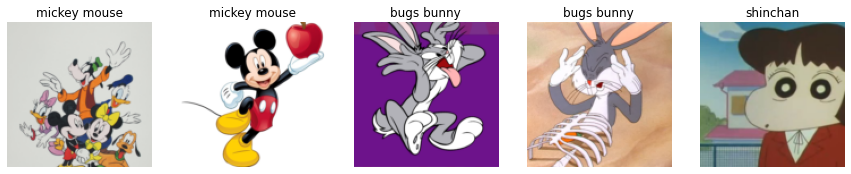

In [5]:
# Have a look at a sample of validation data
# By default center crops the image
# https://docs.fast.ai/vision.augment.html#Resize
dls.train.show_batch(max_n=5, nrows=1)

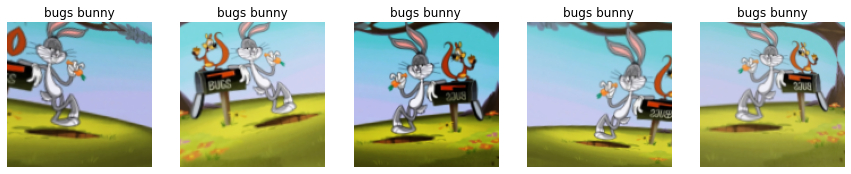

In [6]:
# Augment the data to include transformations for increasing dataset
cartoons = cartoons.new(item_tfms=Resize(128), batch_tfms=aug_transforms(mult=1))
dls = cartoons.dataloaders(path)
dls.train.show_batch(max_n=5, nrows=1, unique = True)

In [7]:
# Train a cnn model to classify these 4 different cartoons from one another
learn = cnn_learner(dls, resnet18, metrics=accuracy)
learn.fine_tune(8, freeze_epochs = 3)

epoch,train_loss,valid_loss,accuracy,time
0,2.217383,1.204509,0.446237,00:07
1,1.641660,1.377370,0.510753,00:07
2,1.264273,1.539179,0.516129,00:07


epoch,train_loss,valid_loss,accuracy,time
0,0.573131,1.690045,0.510753,00:07
1,0.547274,1.529630,0.516129,00:07
2,0.457666,1.234723,0.559140,00:07
3,0.393478,1.381081,0.564516,00:07
4,0.334527,1.525650,0.532258,00:07
5,0.291905,1.447206,0.543011,00:07
6,0.264972,1.394073,0.559140,00:07
7,0.243379,1.372811,0.575269,00:07


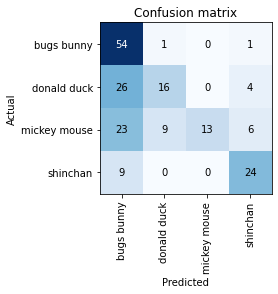

In [8]:
# Look at the confusion matrix to understand where the model is mispredicting most often
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

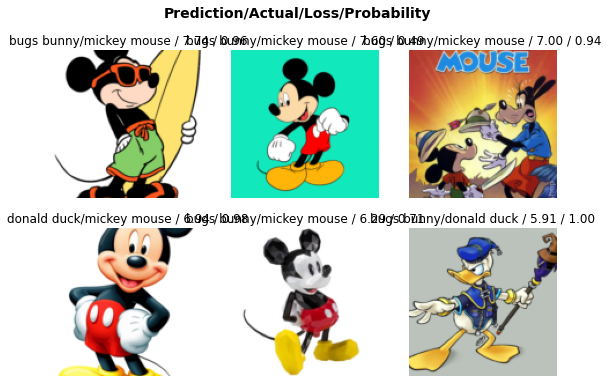

In [9]:
# Plot the images where the model was most confident that the image belongs 
# to a certain category when in fact it didn't
interp.plot_top_losses(6, nrows=2, ncols = 3)

## Export Model

In [10]:
# Export the model to a pickle file so it can be reused later.
learn.export()